# Chapter 17 Model Selection and Cross Validation
# Use Case: Decision Trees to Model App Ratings 
# ===========================================

Dataset: App Ratings  https://www.kaggle.com/code/mdp1990/predicting-google-play-app-store-ratings/data
        

Load data

In [1]:
# package for working with tabular data
import pandas as pd 
import numpy as np

# Package for charting
import matplotlib.pyplot as plt
import seaborn as sns #charts

# package for timing runtime
import time

# package for navigating the operating system
import os

In [2]:
loc = "googleplaystore.csv"
start_time = time.time()
df = pd.read_csv(loc)
print("It took %s seconds to load the .xlsx file." % (time.time() - start_time))

It took 0.04802989959716797 seconds to load the .xlsx file.


In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Categories of app the dataset covers...

In [4]:
df.groupby(['Category'])['Category'].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: Category, dtype: int64

### Data wrangling
For the categorical columns, add one hot encodings (dummy variables) so we can use them in the learning process... text is no good we need numeric data.
For Size, there is annoyingly a suffixed "M". We need to remove this...

In [5]:
# list categorical columns...
cat_cols =['Current Ver', 'Category', 'Type', 'Content Rating', 'Genres', 'Android Ver']

# One hot encoding of catagorical variables...
df[cat_cols].astype("category")

# one hot encodings
one_hot_encodings = pd.get_dummies(df[cat_cols])
one_hot_encodings

,Current Ver_0.0.0.2,Current Ver_0.0.1,Current Ver_0.0.10,Current Ver_0.0.2,Current Ver_0.0.3,Current Ver_0.0.4,Current Ver_0.0.42,Current Ver_0.0.44,Current Ver_0.0.5,Current Ver_0.0.52,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Concatenate df and one_hot_encodings into one df

In [6]:
df = pd.concat([df, one_hot_encodings], axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#remove categorical columns...
df = df.drop(columns=cat_cols)
df

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver_0.0.0.2,Current Ver_0.0.1,Current Ver_0.0.10,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,"January 7, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",0,"January 15, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",0,"August 1, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,"June 8, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,"June 20, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53M,"5,000+",0,"July 25, 2017",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6M,100+,0,"July 6, 2018",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,Parkinson Exercices FR,NaN,3,9.5M,"1,000+",0,"January 20, 2017",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.5,114,Varies with device,"1,000+",0,"January 19, 2015",0,0,0,...,0,0,0,0,0,0,0,0,0,1


Remove the App column too, as it is a str type also

In [8]:
# remove categorical columns... and those that do not have any important 
df = df.drop(columns=['App','Last Updated', 'Reviews', 'Installs'])

Now kill off suffix "+" in Installs and suffixed M in size, and make sure all values in these columns are not numerics

In [9]:
#Data wrangling..... get types and bad values sorted out

# Remove characters in numeric columns (note that the data type was set, by the open_csv function, to object, 
# so we first convert to string before running the replace function (which can only be fun on str types)
df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = df['Size'].str.replace(',', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '')

# Remove any commas too...
df['Size'].str.replace(',', '')

# Convert to numerics so we can use in ML... Make sure type is good. We change the type from str to numeric here, and any 
#df['Installs'] = pd.to_numeric(df['Installs'], errors ='coerce').fillna(0).astype('int')
df['Size'] = pd.to_numeric(df['Size'], errors ='coerce').fillna(0).astype('int')
df['Price'] = pd.to_numeric(df['Price'], errors ='coerce').fillna(0).astype('float')
df['Rating'] = pd.to_numeric(df['Rating'], errors ='coerce').fillna(0).astype('int')


In [10]:
df.head()

,Rating,Size,Price,Current Ver_0.0.0.2,Current Ver_0.0.1,Current Ver_0.0.10,Current Ver_0.0.2,Current Ver_0.0.3,Current Ver_0.0.4,Current Ver_0.0.42,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,4,19,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,14,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,8,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,25,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Setup the models to forecast Rating. We want to know what drives a good rating for an app. Is ours' likely to have a good or a bad rating?

### Decision Trees to Determine Drivers of Ratings: A classification problem

We need to pass numeric data in as X variables, so our data wrangling must have removed all characters, dropped all str columns. 
Our y variable needs to be a str though, containing classes and these classes are what our objective is. In this case we want to understand drivers of good and bad ratings for apps, rating is a numeric value, so we can convert this numeric value into a str value, or we can simply bin the ratings into a sensible number of bins for the problem. Binning into 3 bins (terciles) is a good start as bin 0 will contain the highest rated apps; bin1 the middle; and bin2 the worst rated apps.

In [11]:

# Prepare our X and y variables and wrap as a function
def get_X_and_y(df: pd.DataFrame, bins_to_use: int = 3) -> (pd.DataFrame, pd.DataFrame):
    # Define X variables
    cols  = list(df.columns)
    cols.remove("Rating")

    # Contains only numerics
    X_train = df[cols]

    # Define y variables (rating)
    # label the lowest 33% of ratings as "0", the middle 33% of ratings as "1", the highest 33% as "2"
    bins_to_use = 3
    y_train = pd.qcut(df['Rating'], q=bins_to_use+1, labels=[str(i) for i in range(bins_to_use)], duplicates='drop')
    
    return (X_train, y_train)
    
#Run the func
X_train, y_train = get_X_and_y(df)

Now run the decision tree for our problem

DecisionTreeClassifier(max_depth=3, min_samples_leaf=108, random_state=0)

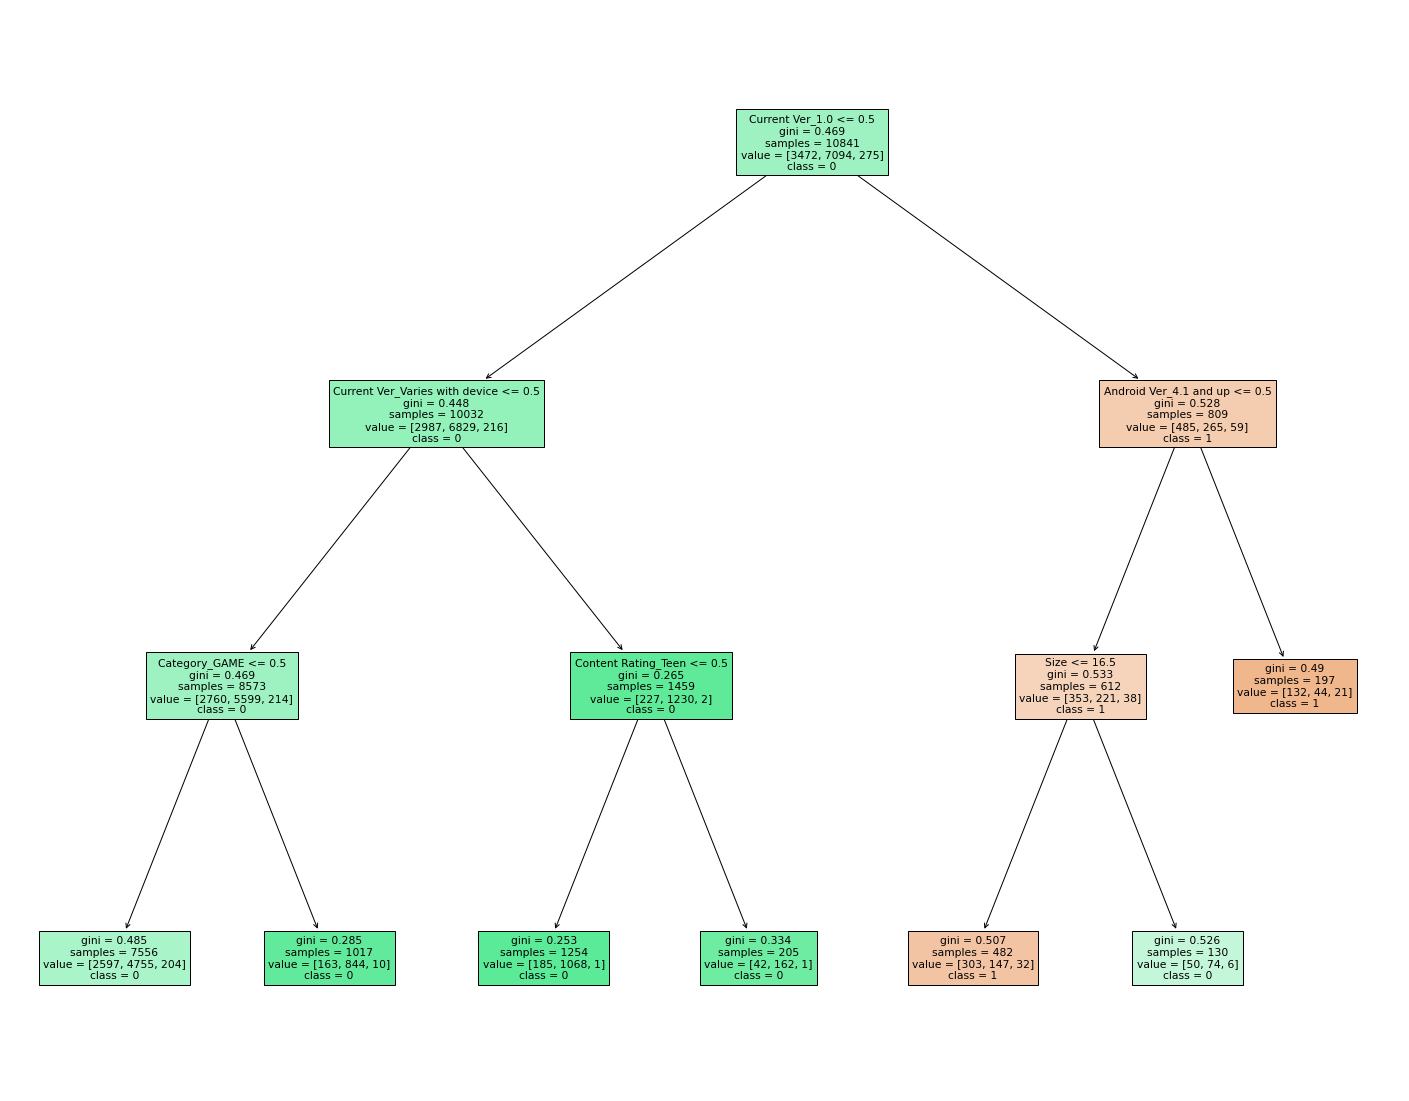

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

#Wrap it up as a function because we will be calling it a few times...
def run_decision_tree(X_train: pd.DataFrame, y_train: pd.DataFrame) -> object:
    # train both classifiers
    dtc = DecisionTreeClassifier(max_depth=3,random_state=0, min_samples_leaf=int(X_train.shape[0]*0.01))
    dtc.fit(X_train,y_train)

    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(dtc, 
                       feature_names=X_train.columns,  
                       class_names=list(y_train.unique()),
                       filled=True)

    return dtc

#Run the func
run_decision_tree(X_train, y_train)

The number of reviews seems to be related to a poor rating or not. This is fairly unhelpful for our problems..

In [13]:
df[(df['Category_FAMILY'] == 1)]

,Rating,Size,Price,Current Ver_0.0.0.2,Current Ver_0.0.1,Current Ver_0.0.10,Current Ver_0.0.2,Current Ver_0.0.3,Current Ver_0.0.4,Current Ver_0.0.42,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
2014,4,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015,4,20,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,4,67,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017,4,19,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018,4,51,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,0,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10827,4,13,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10834,4,2,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4,53,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


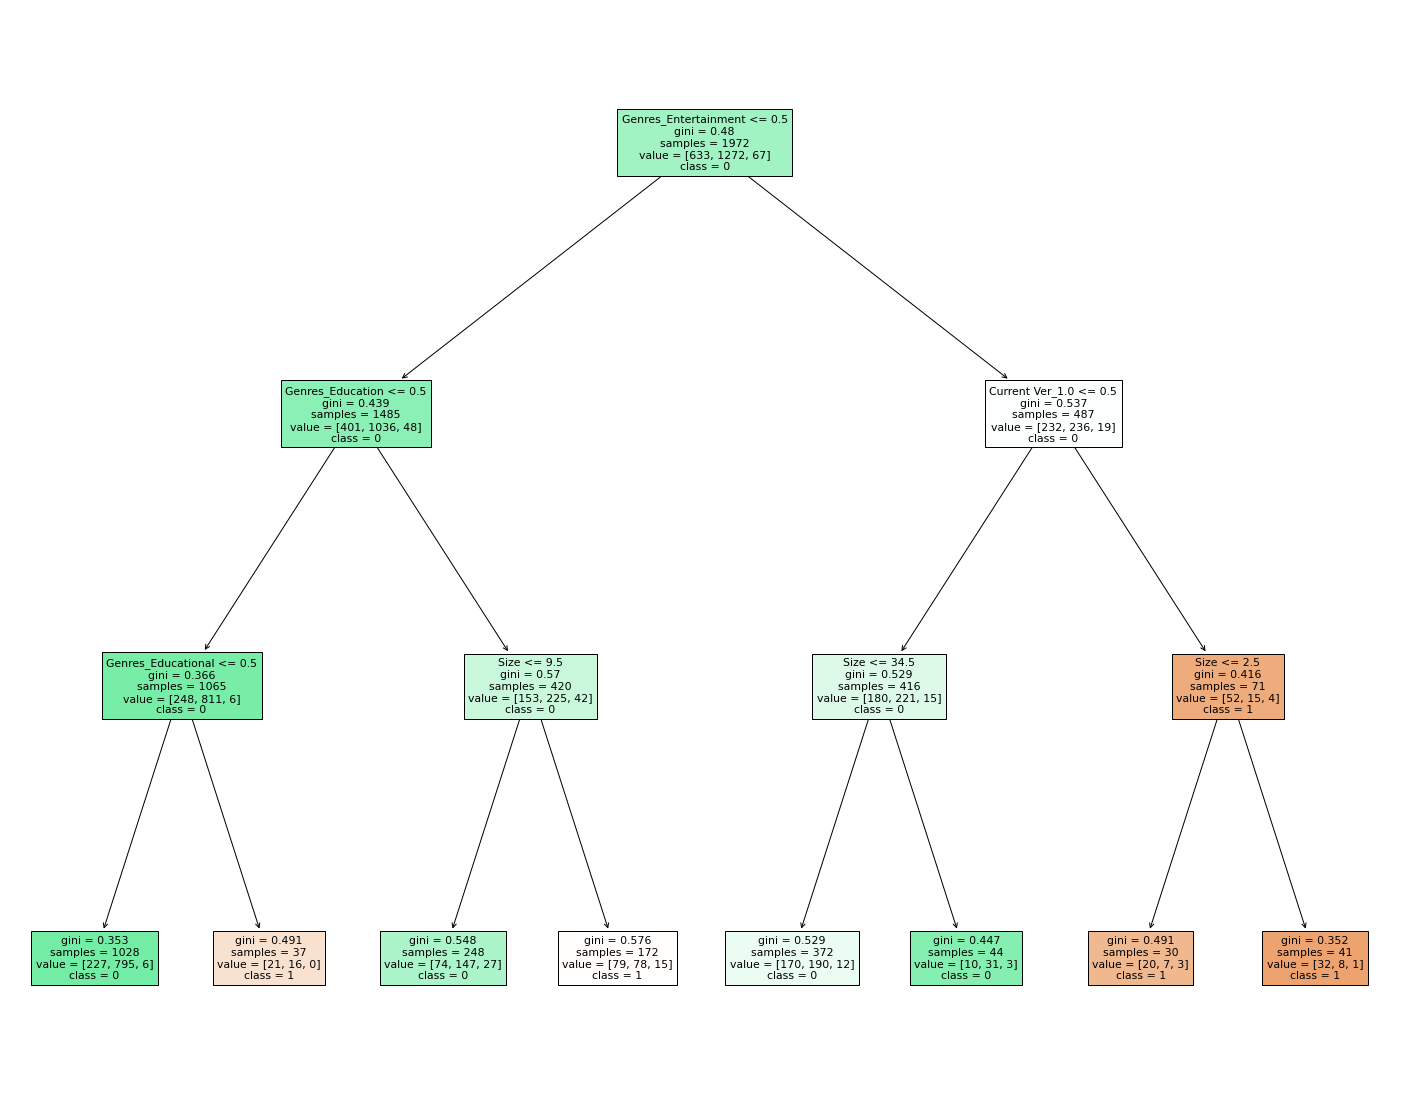

In [14]:
# Family App specific 
df_family = df[(df['Category_FAMILY'] == 1)]
#df_family = df_family.drop(columns=['Genres_Education'])

#Run the func
X_train, y_train = get_X_and_y(df_family)

#Run the func
dtc = run_decision_tree(X_train, y_train)

Test the accuracy of our DT

In [15]:
from sklearn.metrics import accuracy_score

result = dtc.predict(X_train)
scores = accuracy_score(y_train, result)
print('DT, mean: ',scores)

DT, mean:  0.6668356997971603


Cross validation would tend to help to make our decision tree more robust 

In [17]:
from sklearn.model_selection import cross_validate, KFold, LeaveOneOut

cv = KFold(10)
scores = cross_validate(dtc,X_train,y_train,cv=cv,scoring='accuracy',return_train_score=True)
print('10-fold CV, train accuracy, mean: ',scores['train_score'].mean(),', std dev:',scores['train_score'].std())

cv = KFold(20)
scores = cross_validate(dtc,X_train,y_train,cv=cv,scoring='accuracy',return_train_score=True)
print('20-fold CV, train accuracy, mean: ',scores['train_score'].mean(),', std dev:',scores['train_score'].std())


10-fold CV, train accuracy, mean:  0.671510551471172 , std dev: 0.009537576276157362
20-fold CV, train accuracy, mean:  0.6692370403207748 , std dev: 0.007198918014674866
